In [2]:
## creating_cohorts_of_songs_problem_statement (Assignment:2)
# Developed By : Soumen Dey
# Date: Mar-2025
# License: GPL
#------------------------------------------------------------#

In [1]:
import pandas as pd

file_path = 'https://raw.githubusercontent.com/Rimbik/assessments/refs/heads/main/song_recommendation/ds/rolling_stones_spotify.csv'

df_readonly = pd.read_csv(file_path)
df_readonly.head(5)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
# cheak data quality, empty-missing data
df_readonly.info()
print(df_readonly.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [ ]:
# 3. Perform exploratory data analysis and feature engineering
#   a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each # album

x = df_readonly.groupby('album')['popularity'].sum().sort_values(ascending=False).head(2)
df_topSongs = pd.DataFrame(x)
# df1 = df1['popularity'].rename('popular song', inplace=True)

from tabulate import tabulate
print(tabulate(df_topSongs, headers = 'keys', tablefmt = 'psql'))




+---------------------------+--------------+
| album                     |   popularity |
|---------------------------+--------------|
| Honk (Deluxe)             |         1232 |
| Tattoo You (Super Deluxe) |         1008 |
+---------------------------+--------------+


In [ ]:
## Perform Clustering

def getdata_category(df):
    # Separate categorical and numerical variables
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    col_toDrop = ['Unnamed: 0','track_number']
    df = df.drop(columns=categorical_cols)
    df = df.drop(col_toDrop, axis=1)

    return df, categorical_cols, numerical_cols

# get non numerical features from dataset
df_forCluster, categorical_cols, numerical_cols = getdata_category(df_readonly)


df_forCluster.columns
df_forCluster.head(1)
df_forCluster.info()

#------------------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=3)
df_forCluster['cluster'] = kmeans.fit_predict(df_forCluster[['energy','liveness']])

centroids = kmeans.cluster_centers_
cent_x = centroids[:, 0]
cent_y = centroids[:, 1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1610 non-null   float64
 1   danceability      1610 non-null   float64
 2   energy            1610 non-null   float64
 3   instrumentalness  1610 non-null   float64
 4   liveness          1610 non-null   float64
 5   loudness          1610 non-null   float64
 6   speechiness       1610 non-null   float64
 7   tempo             1610 non-null   float64
 8   valence           1610 non-null   float64
 9   popularity        1610 non-null   int64  
 10  duration_ms       1610 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 138.5 KB


In [ ]:

from matplotlib.lines import Line2D
import seaborn as sns

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_PCA(features, df):

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)

    pca = PCA(n_components=2)  # Reduce to 2 principal components
    principal_components = pca.fit_transform(data_scaled)
    pca_df = pd.DataFrame(data=principal_components, columns=features)

    # pca_df['cluster'] = kmeans.fit_predict(df[features])

    # print(pca_df)
    # print(df)

    return pca_df


def show_cluster_KMeans(features, df):

    kmeans = ''
    # Apply PCA : Principal Component Analysis (PCA)
    df = apply_PCA(features, df)

    kmeans = KMeans(n_clusters=3, random_state=3)
    df['cluster'] = kmeans.fit_predict(df[features])

    x = df[features[0]]
    y = df[features[1]]

    centroids = kmeans.cluster_centers_
    cent_x = centroids[:, 0]
    cent_y = centroids[:, 1]

    #------------------------------------
    # Calculate distances from cluster centers
    df['Distance'] = np.linalg.norm(df[features].values - kmeans.cluster_centers_[df['cluster']], axis=1)

    # Identify outliers (e.g., top 10% of distances)
    threshold = np.percentile(df['Distance'], 90)
    outliers = df[df['Distance'] > threshold]
    # print("Outliers:",outliers)
    #------------------------------------

    colors = ['#DF2020','#81DF20','#2095DF']
    fig, ax = plt.subplots(1,2, figsize=(19, 7))

    #------------- Plot 1 --------------
    cent_x = centroids[:, 0]
    cent_y = centroids[:, 1]

    ax[0].scatter(x,y, c=df['cluster'], alpha=0.6, s=10)

    ax[0].set_title(features[0].title() + ' vs ' + features[1].title() + " (with outliers)", color = "#d68910")
    ax[0].set(xlabel=features[0])
    ax[0].set(ylabel=features[1])

    ax[0].scatter(cent_x, cent_y, marker='^', s=200, color=colors)

    # create plot for outlier
    ax[0].scatter(outliers[features[0]], outliers[features[1]], color='red', marker='*', s=20, label='Outlier')
    ax[0].legend()

    #------------- Plot 2 ----------------------

    ax[1].scatter(x,y, c=df['cluster'], alpha=0.6, s=10)

    ax[1].set_title(features[0].title() + ' vs ' + features[1].title() + ' (with centroids)', color="#d68910")
    ax[1].set(xlabel=features[0])
    ax[1].set(ylabel=features[1])

    cent_x = [ i[0] for i in centroids ]
    cent_y = [ i[1] for i in centroids ]

    df['cent_x'] = df.cluster.map({0: cent_x[0], 1: cent_x[1], 2: cent_x[2]})
    df['cent_y'] = df.cluster.map({0: cent_y[0], 1: cent_y[1], 2: cent_y[2]})


    df['c'] = df.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

    ax[1].scatter(cent_x, cent_y, marker='^', s=200, color=colors)
    ax[1].scatter(outliers[features[0]], outliers[features[1]], color="grey", marker='*', s=30, label='Outlier')
    ax[1].legend()

    for idx, val in df.iterrows():
        # print(val.energy, val.iloc[0])

        x = [val.iloc[0], val.cent_x]
        y = [val.iloc[1], val.cent_y]

        plt.plot(x,y, c=val.c, alpha=0.1) #0.6

    plt.show()


    #-----------------------------------------------

In [ ]:
### 4. Perform cluster analysis
  ## PCA

pd.options.mode.copy_on_write = True

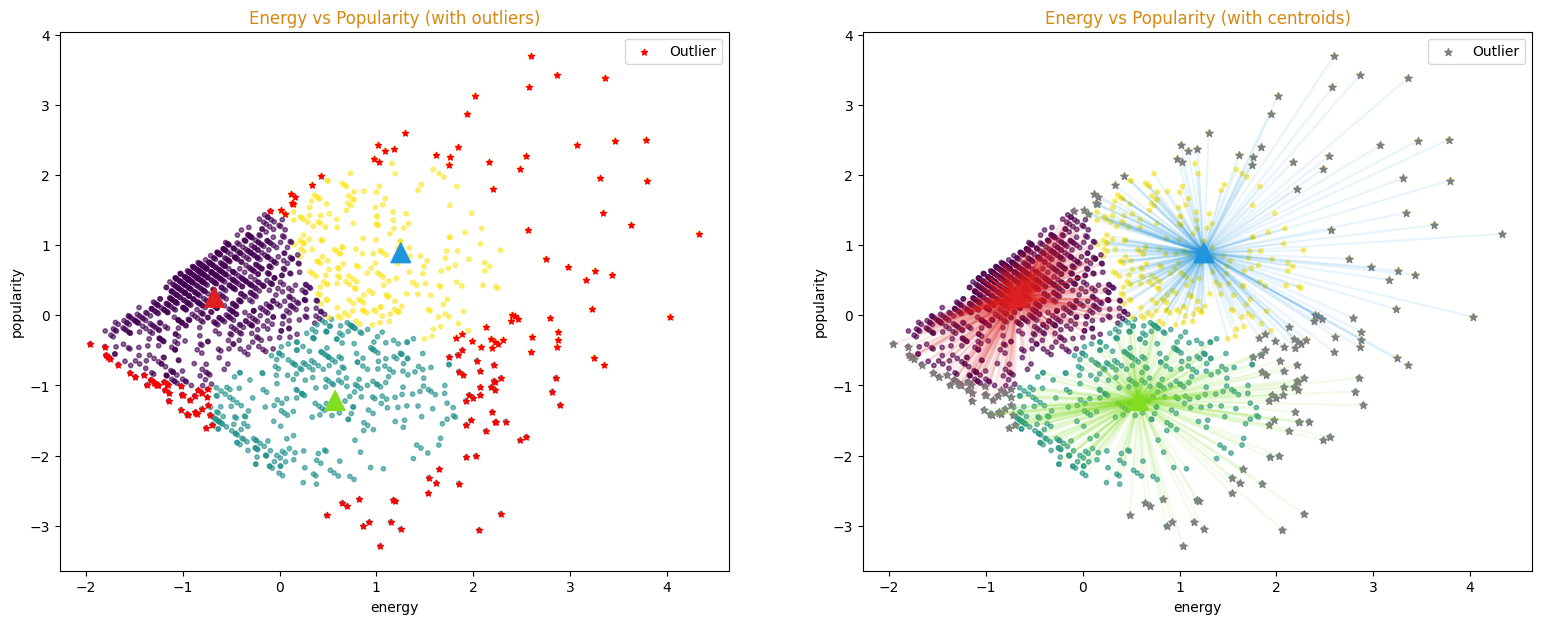

In [ ]:
ft = ['energy','popularity']
show_cluster_KMeans(ft, df_forCluster[ft])


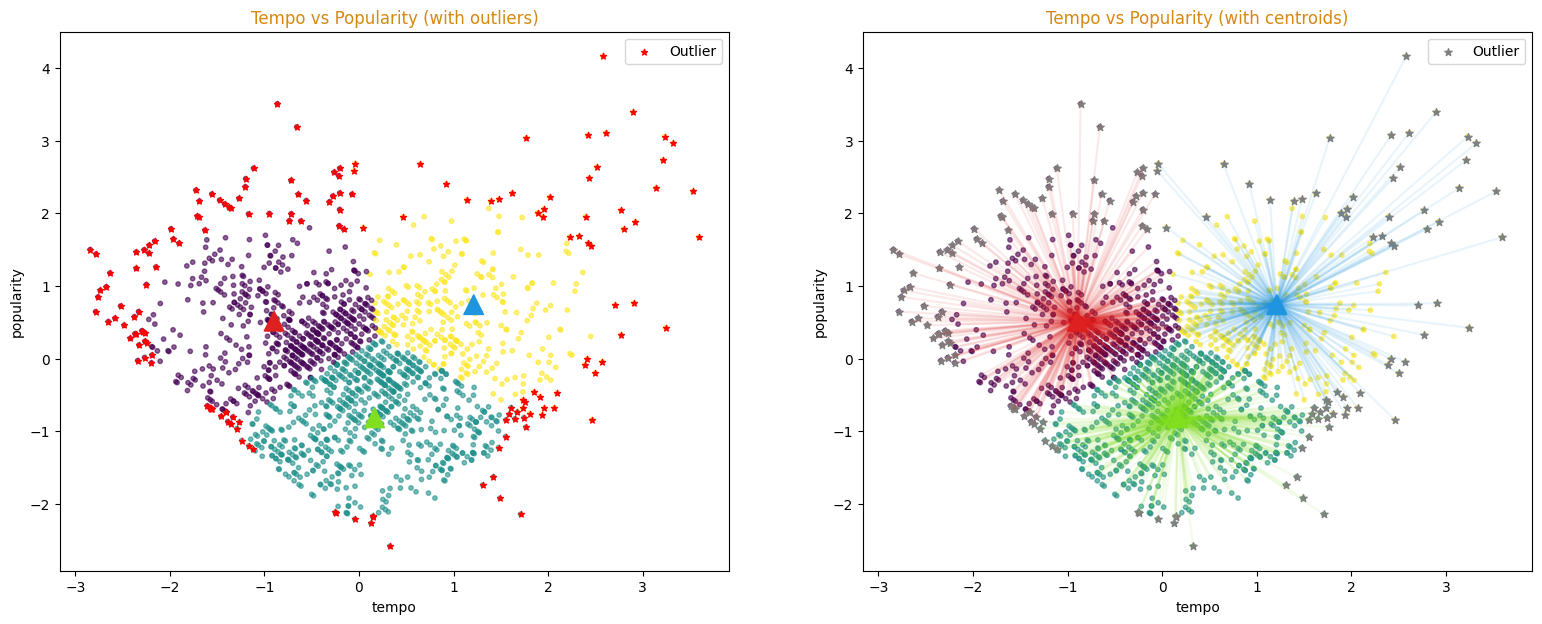

In [ ]:
ft = ['tempo','popularity']
show_cluster_KMeans(ft, df_forCluster[ft])

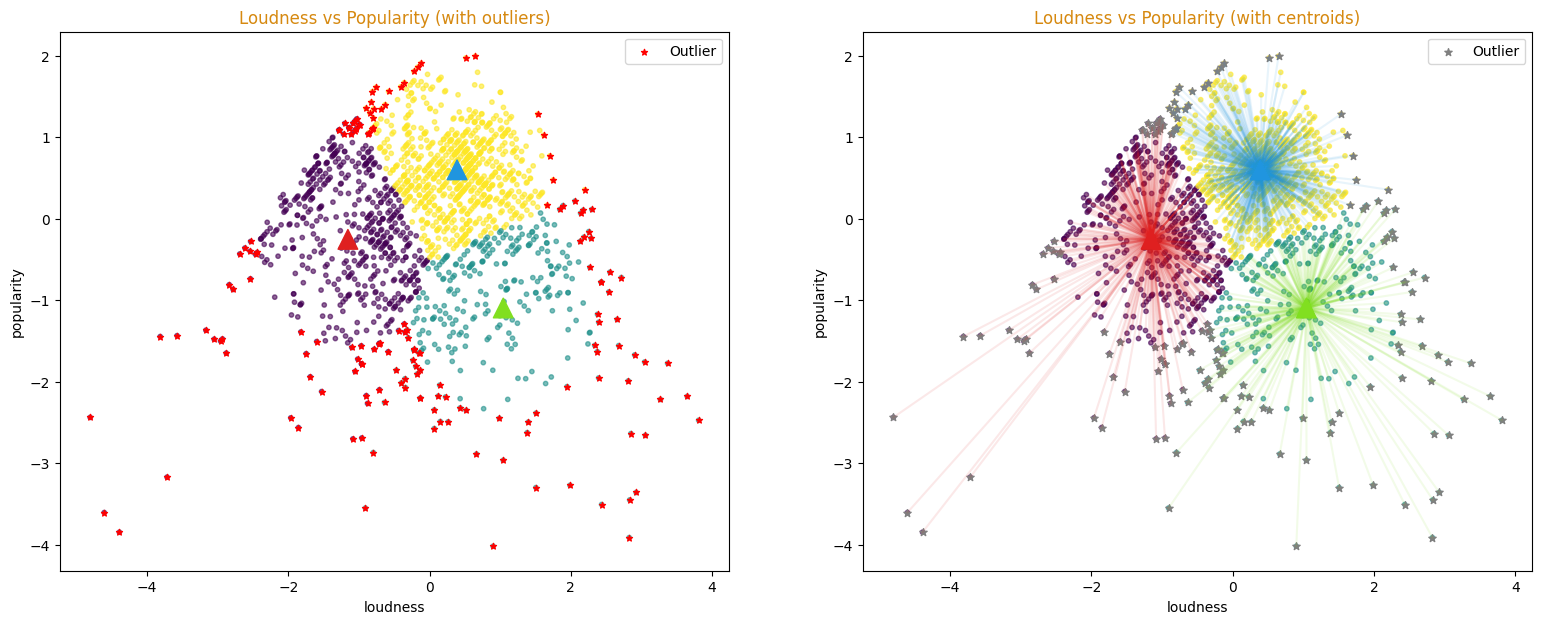

In [ ]:
ft = ['loudness','popularity']
show_cluster_KMeans(ft, df_forCluster[ft])

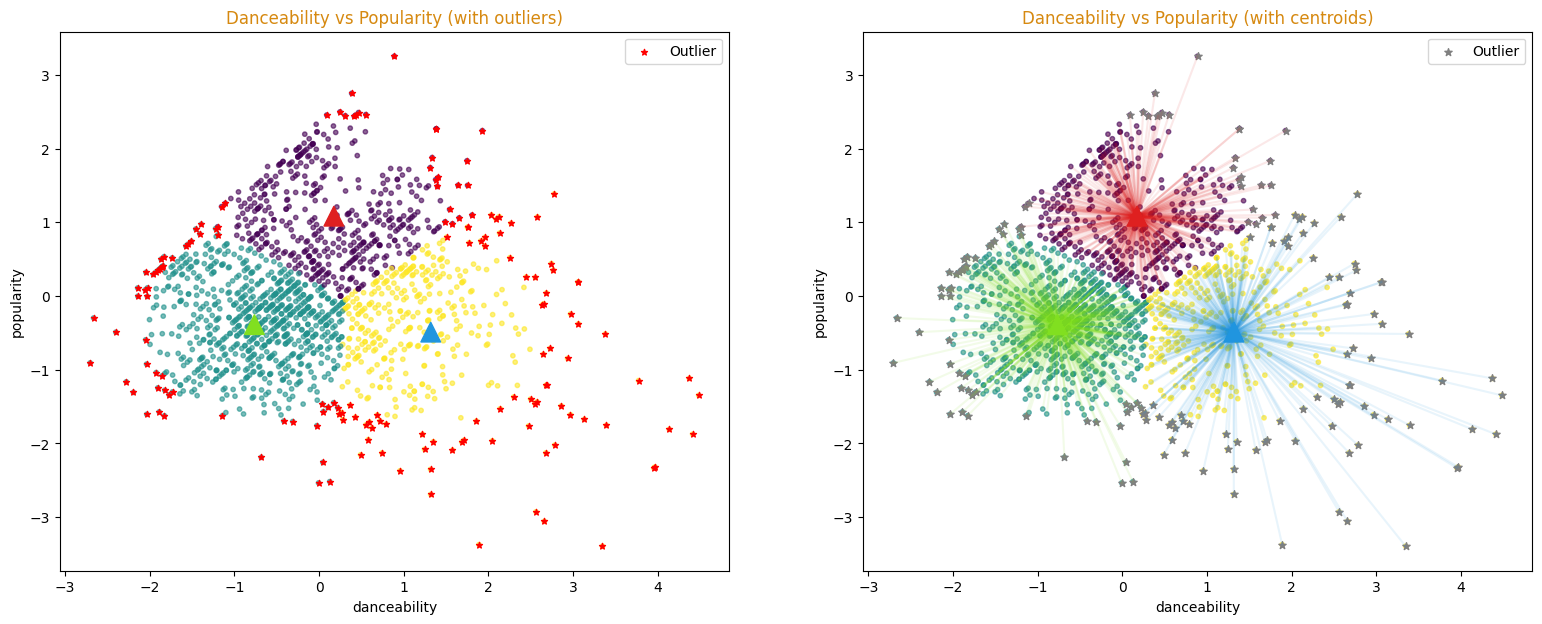

In [ ]:
ft = ['danceability','popularity']
show_cluster_KMeans(ft, df_forCluster[ft])

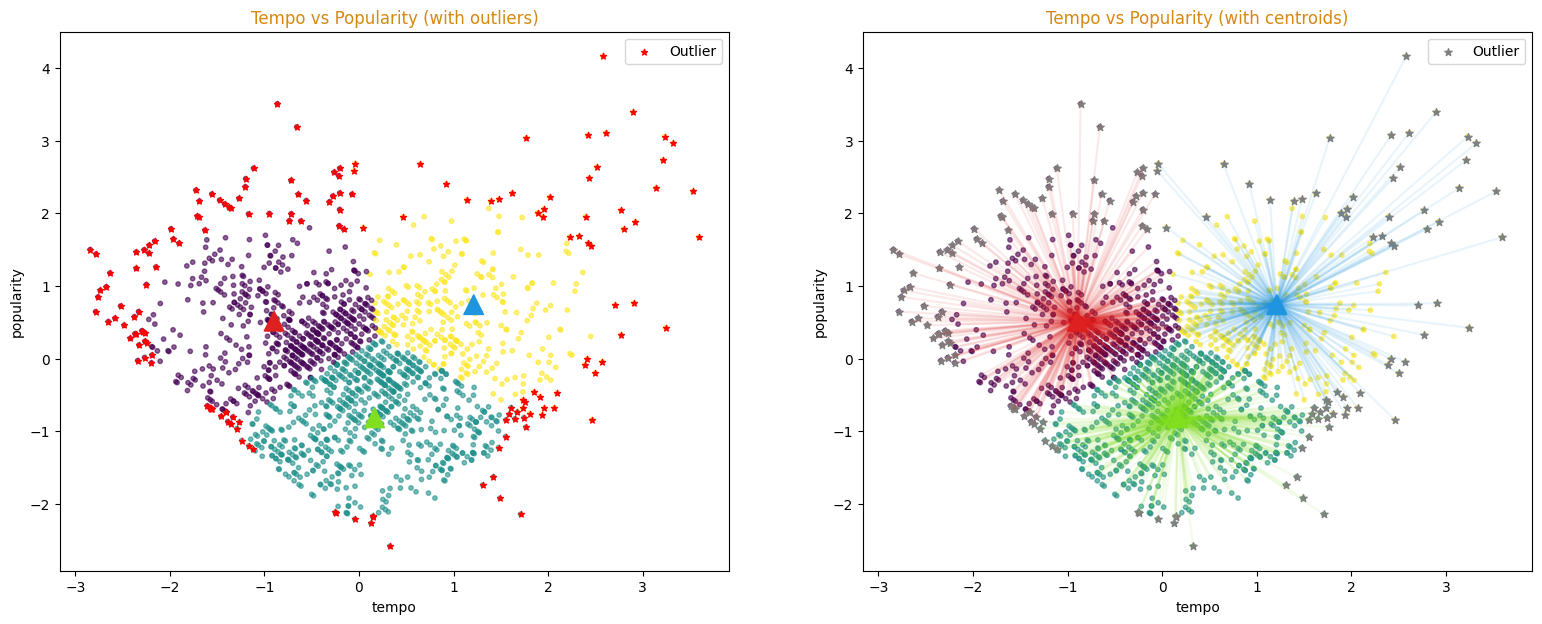

In [ ]:
ft = ['tempo','popularity']
show_cluster_KMeans(ft, df_forCluster[ft])

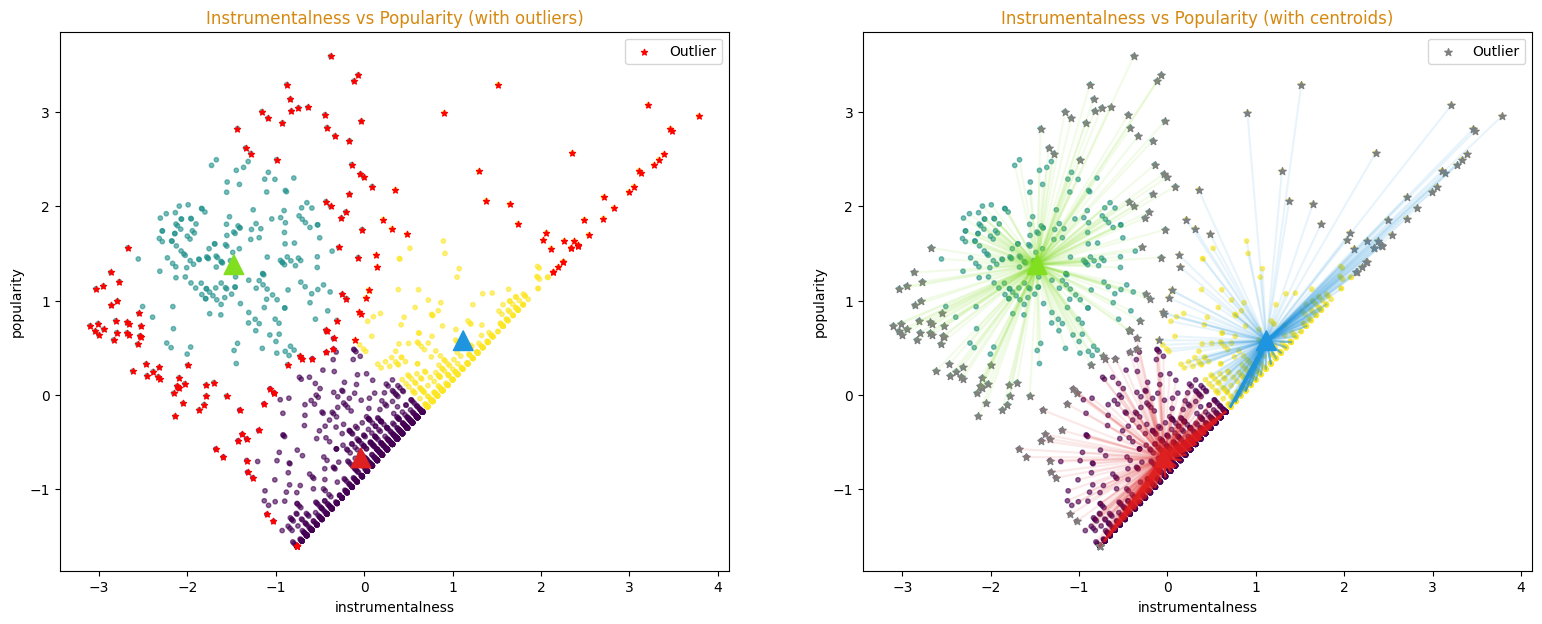

In [ ]:
# instrumentalness
ft = ['instrumentalness','popularity']
show_cluster_KMeans(ft, df_forCluster[ft])

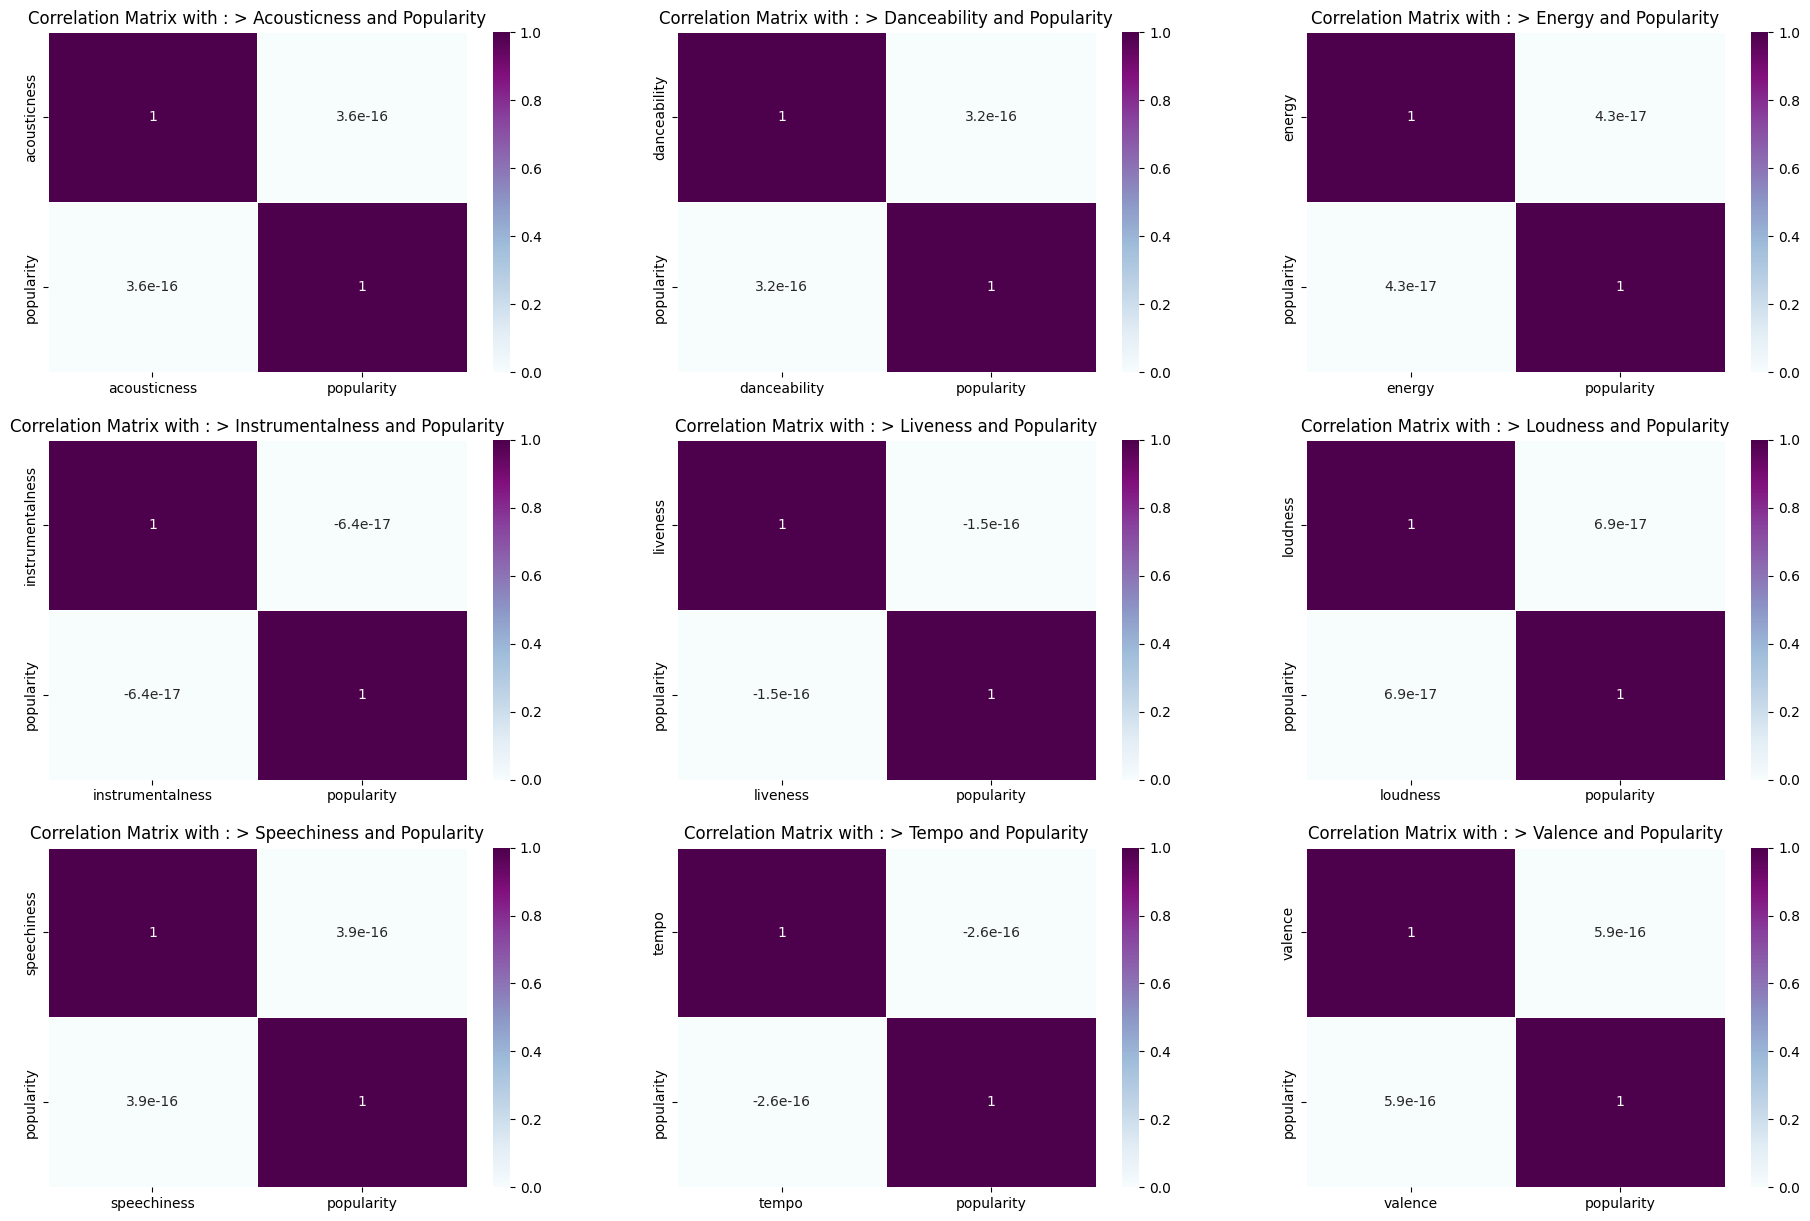

<Figure size 10000x7000 with 0 Axes>

In [ ]:
# Corr metrix

def show_corr_matrix(df, x,y):
  dfAfterPCA = apply_PCA(ft, df_forCluster[ft])
  corr_matrix = dfAfterPCA.corr()

  # Plot the heatmap
  ax[x,y].set_title('Correlation Matrix with : > ' + ft[0].title() + ' and ' + ft[1].title())
  sns.heatmap(corr_matrix, annot=True, cmap='BuPu', linewidths=0.5, ax=ax[x,y])


features = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

fig, ax = plt.subplots(3,3, figsize=(23, 15))
plt.figure(figsize=(100, 70))
plt.subplots_adjust(hspace=0.8)


#----------
ft = [features[0],'popularity']
show_corr_matrix(df_forCluster[ft], 0,0)
ft = [features[1],'popularity']
show_corr_matrix(df_forCluster[ft], 0,1)
ft = [features[2],'popularity']
show_corr_matrix(df_forCluster[ft], 0,2)

ft = [features[3],'popularity']
show_corr_matrix(df_forCluster[ft], 1,0)
ft = [features[4],'popularity']
show_corr_matrix(df_forCluster[ft], 1,1)
ft = [features[5],'popularity']
show_corr_matrix(df_forCluster[ft], 1,2)

ft = [features[6],'popularity']
show_corr_matrix(df_forCluster[ft], 2,0)
ft = [features[7],'popularity']
show_corr_matrix(df_forCluster[ft], 2,1)
ft = [features[8],'popularity']
show_corr_matrix(df_forCluster[ft], 2,2)

plt.show()

# -------------- END -------------------------#